In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [4]:
print(df.shape)
df.head()

(395547, 8)


,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [6]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [7]:
df.describe(include=np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


In [8]:
df20 = df[df['votes']>200000]
df20.shape

(80, 8)

In [9]:
df20.category.value_counts()

인권/성평등         24
안전/환경          10
기타              8
정치개혁            8
문화/예술/체육/언론     7
외교/통일/국방        4
반려동물            4
육아/교육           3
교통/건축/국토        3
보건복지            3
성장동력            2
경제민주화           2
미래              1
행정              1
Name: category, dtype: int64

In [10]:
df20.sort_values(by='votes',ascending=False).head()

,article_id,start,end,answered,votes,category,title,content
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달..."
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...


In [12]:
df['answer'] = (df['votes']>200000) == 1

In [13]:
df['answer'] = df['answer'].astype('int')

In [14]:
df['answer_diff'] = df['answer'] - df['answered']
df['answer_diff'].sum()

51

In [15]:
answered_df = df.loc[df['answer'] == 1]
answered_df.sort_values('votes', ascending=False).head(5)

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,1,1
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,1,1
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",1,0
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,1,0


In [16]:
category = pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


In [17]:
## 과제

In [18]:
#1 분야별로 답변된 청원수 / 등록된 청원수를 구하여 유의미한 청원이 많은 분야 알아보기

In [21]:
answered_df['answered'].sum()

29

In [23]:
df1 = pd.DataFrame(answered_df.groupby('category')['answered'].sum()).reset_index()
df1

,category,answered
0,경제민주화,1
1,교통/건축/국토,2
2,기타,1
3,문화/예술/체육/언론,4
4,미래,1
5,반려동물,0
6,보건복지,2
7,성장동력,2
8,안전/환경,2
9,외교/통일/국방,1


In [31]:
answered_cate = pd.DataFrame(df['category'].value_counts()).reset_index()
answered_cate.columns = ['category', 'counts']
innerdf = pd.merge(answered_cate,df1,left_on='category',right_on='category',how='inner')
innerdf['answered_rate']=innerdf['answered']/innerdf['counts']
innerdf

,category,counts,answered,answered_rate
0,정치개혁,62750,2,0.000032
1,기타,48682,1,0.000021
2,인권/성평등,34993,9,0.000257
3,안전/환경,30638,2,0.000065
4,교통/건축/국토,28184,2,0.000071
5,외교/통일/국방,26626,1,0.000038
6,육아/교육,25537,1,0.000039
7,보건복지,24848,2,0.000080
8,행정,20268,1,0.000049
9,문화/예술/체육/언론,18207,4,0.000220


In [43]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

In [46]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '청원대비 답변비율')

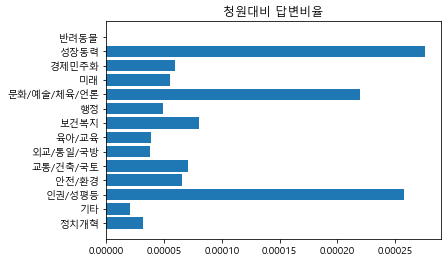

In [58]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)
pos = np.arange(14)
plt.barh(pos,innerdf['answered_rate'],align='center')
plt.yticks(pos,innerdf['category'])
plt.title('청원대비 답변비율')

In [65]:
#2 연도별 청원수 집계
df2['start_year']=df['start'].dt.year
df2['start_month'] = df['start'].dt.month
df2['start_day'] = df['start'].dt.day
df2['start_hour'] = df['start'].dt.hour
df2['start_dow'] = df['start'].dt.dayofweek
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   article_id   395547 non-null  int64         
 1   start        395547 non-null  datetime64[ns]
 2   end          395547 non-null  datetime64[ns]
 3   answered     395547 non-null  int64         
 4   votes        395547 non-null  int64         
 5   category     395547 non-null  object        
 6   title        395547 non-null  object        
 7   content      395546 non-null  object        
 8   answer       395547 non-null  int32         
 9   answer_diff  395547 non-null  int64         
 10  start_year   395547 non-null  int64         
 11  start_month  395547 non-null  int64         
 12  start_day    395547 non-null  int64         
 13  start_hour   395547 non-null  int64         
 14  start_dow    395547 non-null  int64         
dtypes: datetime64[ns](2), int32(1), in

C:\ProgramData\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
# df2['start_year'].value_counts()
df_2 = pd.DataFrame(df2['start_year'].value_counts()).reset_index()
df_2.columns = ['start_year', 'counts']
df_2.sort_values('start_year',ascending=True)

,start_year,counts
1,2017,72119
0,2018,299565
2,2019,23863


Text(0, 0.5, '청원 건수')

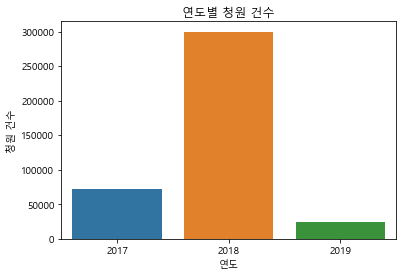

In [73]:
import seaborn as sns
ax = plt.subplots()
ax = sns.countplot('start_year',data=df2)
ax.set_title('연도별 청원 건수')
ax.set_xlabel('연도')
ax.set_ylabel('청원 건수')

In [76]:
#3 20만건이 넘은 청원중 답변을 대기중인 청원의 월별건수

In [82]:
df3 = df2[df2['answer_diff'] == 1]
df3

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_year,start_month,start_day,start_hour,start_dow
137035,164255,2018-03-12,2018-04-11,0,216886,기타,GMO완전표시제 시행을 촉구합니다!,우리나라는 안전성 논란이 계속되고 있는 식용 GMO를 연간 200만 톤 이상 수입합...,1,1,2018,3,12,0,0
138242,165796,2018-03-13,2018-04-12,0,304320,정치개혁,국민들은 정부 개헌안을 지지합니다. 정부의 개헌을 꼭 실현시켜 주십시오.,공약은 중요한 것입니다.\n국민과의 약속입니다.\n대통령님은 공약을 이행해주십시오....,1,1,2018,3,13,0,1
144223,173355,2018-03-23,2018-04-22,0,209494,안전/환경,위장•몰래카메라 판매금지와 몰카범죄 처벌을 강화해주세요.,2012년 전국의 몰카범죄는 2400건 2015년에 들어 3배 이상 증가해 무려 7...,1,1,2018,3,23,0,4
144874,174292,2018-03-24,2018-04-23,0,278128,안전/환경,미세먼지의 위험 그리고 오염 및 중국에대한 항의,미세먼지가 10년전에 비해 상당히 자주 몰려오고있습니다.\n언론에서도 중국발이라고 ...,1,1,2018,3,24,0,5
148359,178781,2018-03-28,2018-04-27,0,215036,안전/환경,세월호 관련 청문회 위증한 조여옥대위 징계바랍니다.,세월호 관련해서 그 동안 거짓으로 감추고 숨겨왔던 사실들이 조금씩 드러나고 있습니다...,1,1,2018,3,28,0,2
154986,187633,2018-04-06,2018-05-06,0,242286,경제민주화,삼성증권 시스템 규제와 공매도 금지,우리사주 280만주에 배당 주당 1000원 하기로 하고 현금배당 28억원이 나가야될...,1,1,2018,4,6,0,4
161851,199622,2018-04-14,2018-05-14,0,236714,문화/예술/체육/언론,티비 조선의 종편 허가 취소 청원,"과거부터 현재진행형으로 허위, 과장, 날조 보도를 일삼고\n국민의 알권리를 호도하는...",1,1,2018,4,14,0,5
161950,199778,2018-04-15,2018-05-15,0,216163,기타,어른들에게 성적 학대와 조롱을 당하고 있는 아이들을 구해주세요.,"4월 1일 새벽 2시 경, 구글 서칭 중 불법 야동 사이트(https://y****...",1,1,2018,4,15,0,6
163363,201953,2018-04-16,2018-05-16,0,260624,정치개혁,선관위의 위법사항 내용에 따른 국회의원 전원 위법사실 여부 전수조사를 청원합니다.,이미 청와대가 선관위에 질의사항으로 접수한\n김기식 금융감독원장의 정치자금법 위반 ...,1,1,2018,4,16,0,0
175768,219348,2018-05-02,2018-06-01,0,334173,기타,(한번씩만 봐주세요.)저의 일은 아니지만 이런 일은 좀 강력 처벌 강력하게 조치 해...,"일단 저의 일은 아니지만 저의 가족,친구,지인이 이런일을 당하면 정말 안되겠다고 생...",1,1,2018,5,2,0,2


In [92]:
dff = pd.DataFrame(df3.groupby(['start_year','start_month']).sum()).reset_index()
dff

,start_year,start_month,article_id,answered,votes,answer,answer_diff,start_day,start_hour,start_dow
0,2018,3,856479,0,1223864,5,5,100,0,12
1,2018,4,788986,0,955787,4,4,51,0,15
2,2018,5,1420930,0,1545360,6,6,111,0,20
3,2018,6,1664240,0,1915439,6,6,121,0,27
4,2018,7,931230,0,830669,3,3,54,0,13
5,2018,9,754366,0,564823,2,2,25,0,5
6,2018,10,4963568,0,3902382,12,12,243,0,28
7,2018,11,2666981,0,1602358,6,6,100,0,14
8,2018,12,1397272,0,734365,3,3,31,0,8
9,2019,1,2022911,0,1093836,4,4,95,0,4


Text(0.5, 1.0, '월별 미응답 청원수')

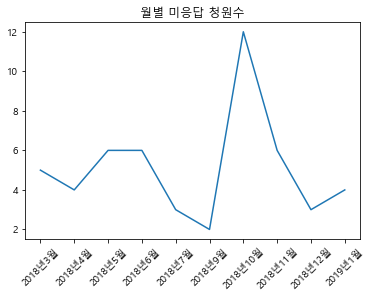

In [118]:
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)
pos2 = np.arange(10)
plt.plot(pos2,dff['answer_diff'])
plt.xticks(pos2,labels=['2018년3월','2018년4월','2018년5월','2018년6월','2018년7월','2018년9월','2018년10월','2018년11월','2018년12월','2019년1월'],rotation=45)
plt.title('월별 미응답 청원수')

([<matplotlib.axis.XTick at 0x23fbce5a848>,
 [Text(0, 0, '월'),
  Text(1, 0, '화'),
  Text(2, 0, '수'),
  Text(3, 0, '목'),
  Text(4, 0, '금'),
  Text(5, 0, '토'),
  Text(6, 0, '일')])

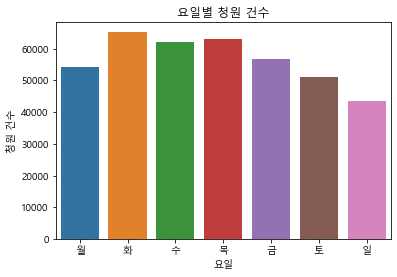

In [119]:
#4 요일별 청원건수
ax = plt.subplots()
ax = sns.countplot('start_dow',data=df2)
ax.set_title('요일별 청원 건수')
ax.set_xlabel('요일')
ax.set_ylabel('청원 건수')
plt.xticks(np.arange(7),labels=['월','화','수','목','금','토','일'])
# 오히려 주말에 청원건수가 적은것을 알 수 있다

In [120]:
#5피봇 테이블로 투표를 가장 많이 받은 분야를 찾아보세요.
petitions_unique = pd.pivot_table(df, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', \
                                              ascending=False).reset_index()
petitions_best

,category,answer,answer_diff,answered,article_id,votes
0,인권/성평등,24,15,9,7963154504,12559348
1,안전/환경,10,8,2,7529327085,6605175
2,정치개혁,8,6,2,14675522264,6205013
3,기타,8,7,1,12225143856,5190468
4,육아/교육,3,2,1,5822857976,4475297
5,보건복지,3,1,2,6589637853,4341211
6,문화/예술/체육/언론,7,3,4,4427495546,4149796
7,외교/통일/국방,4,3,1,6869752323,3696112
8,교통/건축/국토,3,1,2,8551310963,2902330
9,반려동물,4,4,0,1033826398,2066624


Text(0.5, 1.0, '투표수의 displot과 rugplot')

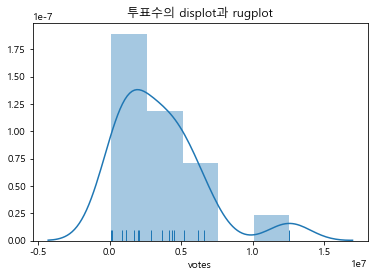

In [126]:
ax = plt.subplots()
ax = sns.distplot(petitions_best['votes'],rug=True)
ax.set_xlabel('votes')
plt.title("투표수의 displot과 rugplot")